In [115]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib 
from pre import data_pre

pd.set_option("display.max_rows", 500)

In [46]:
# データセットの用意

file_path = '.../dataset/nishika/old_apartment_2020/train/01.csv'

files = glob.glob("/tmp/working/dataset/nishika/old_apartment_2020/train/*")

# trainデータ読み込み
data_list = []
for i, file in enumerate(files):
    data_list.append(pd.read_csv(file, index_col=0))

df = pd.concat(data_list)


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651975 entries, 1117225 to 47001939
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   種類            651975 non-null  object 
 1   地域            0 non-null       float64
 2   市区町村コード       651975 non-null  int64  
 3   都道府県名         651975 non-null  object 
 4   市区町村名         651975 non-null  object 
 5   地区名           651318 non-null  object 
 6   最寄駅：名称        649342 non-null  object 
 7   最寄駅：距離（分）     628916 non-null  object 
 8   間取り           629546 non-null  object 
 9   面積（㎡）         651975 non-null  object 
 10  土地の形状         0 non-null       float64
 11  間口            0 non-null       float64
 12  延床面積（㎡）       0 non-null       float64
 13  建築年           633280 non-null  object 
 14  建物の構造         637098 non-null  object 
 15  用途            601333 non-null  object 
 16  今後の利用目的       288948 non-null  object 
 17  前面道路：方位       0 non-null       float64
 

In [48]:
# 前処理
all_null_list = []

for col in df.columns:
    if df[col].count() == 0:
        all_null_list.append(col)

df = df.drop(all_null_list, axis=1)

In [49]:
df.head()

,種類,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
ID,,,,,,,,,,,,,,,,,,,,
1117225,中古マンション等,1213,北海道,苫小牧市,新中野町,苫小牧,25,３ＬＤＫ,120,平成21年,ＲＣ,住宅,住宅,準工業地域,60.0,200.0,2018年第３四半期,未改装,NaN,7.431364
1001180,中古マンション等,1101,北海道,札幌市中央区,北２条西,西２８丁目,8,４ＬＤＫ,150,平成14年,ＳＲＣ,NaN,住宅,近隣商業地域,80.0,300.0,2018年第３四半期,未改装,NaN,7.568202
1099061,中古マンション等,1207,北海道,帯広市,西３条南,帯広,2,２ＬＤＫ,80,平成14年,ＲＣ,住宅,住宅,商業地域,80.0,500.0,2016年第２四半期,未改装,NaN,7.204120
1039968,中古マンション等,1105,北海道,札幌市豊平区,平岸２条,南平岸,6,３ＬＤＫ,90,平成9年,NaN,住宅,住宅,近隣商業地域,80.0,300.0,2018年第４四半期,改装済,NaN,7.447158
1072923,中古マンション等,1202,北海道,函館市,梁川町,五稜郭,30分?60分,２ＬＤＫ,70,平成24年,ＲＣ,住宅,住宅,商業地域,80.0,400.0,2015年第１四半期,未改装,NaN,7.322219


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651975 entries, 1117225 to 47001939
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   種類            651975 non-null  object 
 1   市区町村コード       651975 non-null  int64  
 2   都道府県名         651975 non-null  object 
 3   市区町村名         651975 non-null  object 
 4   地区名           651318 non-null  object 
 5   最寄駅：名称        649342 non-null  object 
 6   最寄駅：距離（分）     628916 non-null  object 
 7   間取り           629546 non-null  object 
 8   面積（㎡）         651975 non-null  object 
 9   建築年           633280 non-null  object 
 10  建物の構造         637098 non-null  object 
 11  用途            601333 non-null  object 
 12  今後の利用目的       288948 non-null  object 
 13  都市計画          633162 non-null  object 
 14  建ぺい率（％）       629168 non-null  float64
 15  容積率（％）        629168 non-null  float64
 16  取引時点          651975 non-null  object 
 17  改装            593301 non-null  object 
 

In [51]:
df["種類"].value_counts()
df = df.drop("種類", axis=1)

In [52]:
## 市区町村名と市区町村コードの辞書を作る

dict_df = df[["市区町村コード", "市区町村名"]]
dict_df = dict_df[~dict_df.duplicated()].sort_values("市区町村コード").reset_index(drop=True)

In [53]:
# 市区町村コードを削除する
df = df.drop("市区町村コード", axis=1)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651975 entries, 1117225 to 47001939
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   都道府県名         651975 non-null  object 
 1   市区町村名         651975 non-null  object 
 2   地区名           651318 non-null  object 
 3   最寄駅：名称        649342 non-null  object 
 4   最寄駅：距離（分）     628916 non-null  object 
 5   間取り           629546 non-null  object 
 6   面積（㎡）         651975 non-null  object 
 7   建築年           633280 non-null  object 
 8   建物の構造         637098 non-null  object 
 9   用途            601333 non-null  object 
 10  今後の利用目的       288948 non-null  object 
 11  都市計画          633162 non-null  object 
 12  建ぺい率（％）       629168 non-null  float64
 13  容積率（％）        629168 non-null  float64
 14  取引時点          651975 non-null  object 
 15  改装            593301 non-null  object 
 16  取引の事情等        18397 non-null   object 
 17  取引価格（総額）_log  651975 non-null  float64
d

In [55]:
df["最寄駅：距離（分）"].value_counts()

6          52168
4          50172
5          46516
8          45370
3          44006
9          39307
7          33154
30分?60分    32600
10         32328
11         31346
2          27821
13         23410
1          20210
14         19197
15         18961
12         15464
16         14678
18         11929
19         10746
20          9079
21          7308
23          6799
25          6290
24          5003
28          4213
26          4078
0           3784
1H?1H30     3692
29          3667
17          2555
22          1096
2H?          849
1H30?2H      703
27           417
Name: 最寄駅：距離（分）, dtype: int64

In [56]:
dis = {
    "30分?60分": 45,
    "1H?1H30": 75,
    "1H30?2H": 105,
    "2H?": 120
}

In [57]:
df["最寄駅：距離（分）"] = df["最寄駅：距離（分）"].replace(dis).astype(float)

In [58]:
# df["最寄駅：距離（分）"].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651975 entries, 1117225 to 47001939
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   都道府県名         651975 non-null  object 
 1   市区町村名         651975 non-null  object 
 2   地区名           651318 non-null  object 
 3   最寄駅：名称        649342 non-null  object 
 4   最寄駅：距離（分）     628916 non-null  float64
 5   間取り           629546 non-null  object 
 6   面積（㎡）         651975 non-null  object 
 7   建築年           633280 non-null  object 
 8   建物の構造         637098 non-null  object 
 9   用途            601333 non-null  object 
 10  今後の利用目的       288948 non-null  object 
 11  都市計画          633162 non-null  object 
 12  建ぺい率（％）       629168 non-null  float64
 13  容積率（％）        629168 non-null  float64
 14  取引時点          651975 non-null  object 
 15  改装            593301 non-null  object 
 16  取引の事情等        18397 non-null   object 
 17  取引価格（総額）_log  651975 non-null  float64
d

In [59]:
df["面積（㎡）"].value_counts()

70         72160
65         66801
60         53381
75         48693
20         42349
55         40243
80         33264
50         28486
15         25828
85         20180
25         19564
45         18047
70         13246
65         13232
90         12791
40         12622
60         11192
20         11150
30         10238
35          9764
95          9365
75          9237
55          7923
80          7166
25          5704
15          5606
50          5319
100         4565
85          4504
45          3059
90          2913
40          2775
105         2643
30          2526
35          2166
95          1892
110         1648
115         1189
10          1038
100          974
120          808
125          599
105          589
130          403
110          400
115          330
135          311
10           295
145          226
120          211
140          204
130          151
150          150
125          146
155          134
135           93
160           91
180           83
165           

In [60]:
df["面積（㎡）"] = df["面積（㎡）"].replace("2000㎡以上", 2000).astype(float)

In [61]:
df["建築年"].value_counts()

平成20年    22423
平成3年     22388
平成18年    22172
平成19年    21892
平成10年    21160
平成15年    21145
平成17年    20906
平成12年    20905
平成7年     20837
平成2年     20317
平成14年    19884
平成8年     19879
平成9年     19238
平成13年    19125
平成11年    18912
平成16年    18762
昭和64年    17209
平成4年     16427
昭和63年    16313
平成21年    15778
平成6年     14557
昭和62年    14140
昭和59年    14001
昭和60年    13482
昭和61年    12910
昭和49年    11907
平成5年     10964
平成22年    10077
昭和54年     8977
昭和57年     8875
昭和55年     8713
昭和56年     8379
平成24年     8217
平成23年     7796
昭和48年     7490
昭和58年     7142
昭和53年     6943
平成25年     6880
昭和50年     6570
平成26年     5701
昭和52年     5637
昭和51年     5306
昭和47年     4937
平成27年     4874
昭和46年     4387
昭和45年     3765
平成28年     3341
昭和44年     2242
平成29年     2168
昭和43年     2094
平成30年     1414
平成31年      984
昭和42年      888
昭和41年      597
戦前         558
昭和40年      199
昭和39年      151
令和2年       109
昭和38年       48
昭和37年       29
昭和34年       21
昭和22年       21
昭和36年       17
昭和21年       16
昭和33年       12
昭和25年       12
昭和28年     

In [62]:
year_dist = {}
for i in df["建築年"].value_counts().keys():
    if "平成" in i:
        num = i.split("平成")[1].split("年")[0]
        year = 33 - int(num)
    if "昭和" in i:
        num = i.split("昭和")[1].split("年")[0]
        year = 96 - int(num)
    if "令和" in i:
        num = i.split("令和")[1].split("年")[0]
        year = 3 - int(num)
    if "戦前" in i:
        year = 76
    year_dist[i] = year

df["建築年"] = df["建築年"].replace(year_dist).astype(float)

In [63]:
# df["建築年"].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651975 entries, 1117225 to 47001939
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   都道府県名         651975 non-null  object 
 1   市区町村名         651975 non-null  object 
 2   地区名           651318 non-null  object 
 3   最寄駅：名称        649342 non-null  object 
 4   最寄駅：距離（分）     628916 non-null  float64
 5   間取り           629546 non-null  object 
 6   面積（㎡）         651975 non-null  float64
 7   建築年           633280 non-null  float64
 8   建物の構造         637098 non-null  object 
 9   用途            601333 non-null  object 
 10  今後の利用目的       288948 non-null  object 
 11  都市計画          633162 non-null  object 
 12  建ぺい率（％）       629168 non-null  float64
 13  容積率（％）        629168 non-null  float64
 14  取引時点          651975 non-null  object 
 15  改装            593301 non-null  object 
 16  取引の事情等        18397 non-null   object 
 17  取引価格（総額）_log  651975 non-null  float64
d

In [64]:
df["建物の構造"].value_counts()

ＲＣ            440826
ＳＲＣ           190634
鉄骨造             4352
ＳＲＣ、ＲＣ           689
ＲＣ、鉄骨造           321
ＳＲＣ、鉄骨造          147
木造                85
ブロック造             22
軽量鉄骨造             18
ＳＲＣ、ＲＣ、鉄骨造         2
ＲＣ、ブロック造           1
ＲＣ、木造              1
Name: 建物の構造, dtype: int64

In [65]:
df["用途"].value_counts()

住宅               593752
事務所                3558
店舗                 2887
その他                 785
駐車場                  99
事務所、店舗               63
住宅、店舗                54
倉庫                   54
住宅、事務所               34
住宅、その他               16
工場                    7
住宅、駐車場                5
倉庫、店舗                 4
倉庫、駐車場                3
駐車場、店舗                2
作業場                   2
店舗、その他                2
事務所、倉庫                2
住宅、倉庫                 1
住宅、店舗、その他             1
事務所、駐車場               1
住宅、事務所、駐車場、店舗         1
Name: 用途, dtype: int64

In [66]:
df["今後の利用目的"].value_counts()

住宅     268213
その他     16418
事務所      3206
店舗       1111
Name: 今後の利用目的, dtype: int64

In [67]:
df["都市計画"].value_counts()

商業地域                      176913
第１種中高層住居専用地域              101657
第１種住居地域                    99696
準工業地域                      74359
近隣商業地域                     65533
第２種中高層住居専用地域               30075
第２種住居地域                    30045
第１種低層住居専用地域                19846
工業地域                       16291
準住居地域                      12966
市街化調整区域                     4126
第２種低層住居専用地域                  895
市街化区域及び市街化調整区域外の都市計画区域       308
工業専用地域                       226
都市計画区域外                      219
準都市計画区域                        7
Name: 都市計画, dtype: int64

In [68]:
df["建ぺい率（％）"].value_counts()

60.0    357095
80.0    252042
50.0     14435
40.0      4710
30.0       469
70.0       417
Name: 建ぺい率（％）, dtype: int64

In [69]:
df["容積率（％）"].value_counts()

200.0     299814
400.0     106052
300.0      87054
500.0      41757
600.0      39261
150.0      23127
100.0       9851
700.0       8525
800.0       6969
80.0        5957
1000.0       363
60.0         308
900.0         79
50.0          29
1200.0        11
1100.0         6
1300.0         5
Name: 容積率（％）, dtype: int64

In [70]:
df["取引時点"].value_counts()

2020年第１四半期    14450
2014年第１四半期    13561
2017年第１四半期    13248
2015年第１四半期    13237
2013年第１四半期    13233
2013年第２四半期    13221
2018年第１四半期    13190
2016年第１四半期    13099
2019年第２四半期    13069
2016年第２四半期    13044
2019年第１四半期    12984
2010年第４四半期    12867
2019年第３四半期    12856
2015年第２四半期    12808
2018年第４四半期    12733
2011年第１四半期    12675
2017年第４四半期    12600
2015年第４四半期    12551
2018年第２四半期    12531
2015年第３四半期    12485
2016年第３四半期    12470
2017年第３四半期    12458
2010年第３四半期    12457
2013年第４四半期    12412
2016年第４四半期    12389
2019年第４四半期    12192
2014年第４四半期    12187
2013年第３四半期    12173
2018年第３四半期    11996
2010年第１四半期    11984
2017年第２四半期    11806
2012年第４四半期    11753
2012年第１四半期    11666
2014年第３四半期    11661
2010年第２四半期    11596
2014年第２四半期    11499
2009年第４四半期    11488
2012年第２四半期    11115
2009年第３四半期    10983
2012年第３四半期    10946
2011年第４四半期    10934
2009年第２四半期    10883
2011年第３四半期    10779
2009年第１四半期    10605
2011年第２四半期    10506
2008年第３四半期     9962
2008年第４四半期     9947
2008年第２四半期     9873
2008年第１四半期     9541
2007年第４四半期     9304


In [71]:
year = {
    "年第１四半期":".25",
    "年第２四半期":".50",
    "年第３四半期":".75",
    "年第４四半期":".99"
}

year_list = {}
for i in df["取引時点"].value_counts().keys():
    for k, j in year.items():
        if k in i:
            year_rep = i.replace(k, j)

    year_list[i] = year_rep

df["取引時点"] = df["取引時点"].replace(year_list).astype(float)

In [72]:
df["取引時点"].value_counts()

2020.25    14450
2014.25    13561
2017.25    13248
2015.25    13237
2013.25    13233
2013.50    13221
2018.25    13190
2016.25    13099
2019.50    13069
2016.50    13044
2019.25    12984
2010.99    12867
2019.75    12856
2015.50    12808
2018.99    12733
2011.25    12675
2017.99    12600
2015.99    12551
2018.50    12531
2015.75    12485
2016.75    12470
2017.75    12458
2010.75    12457
2013.99    12412
2016.99    12389
2019.99    12192
2014.99    12187
2013.75    12173
2018.75    11996
2010.25    11984
2017.50    11806
2012.99    11753
2012.25    11666
2014.75    11661
2010.50    11596
2014.50    11499
2009.99    11488
2012.50    11115
2009.75    10983
2012.75    10946
2011.99    10934
2009.50    10883
2011.75    10779
2009.25    10605
2011.50    10506
2008.75     9962
2008.99     9947
2008.50     9873
2008.25     9541
2007.99     9304
2007.50     9144
2007.75     8914
2007.25     6174
2006.99     5613
2006.75     5395
2006.50     5221
2006.25     4322
2005.99     3650
2005.75     35

In [73]:
df["改装"].value_counts()

未改装    428233
改装済    165068
Name: 改装, dtype: int64

In [74]:
df["取引の事情等"].value_counts()

調停・競売等              17301
関係者間取引                877
その他事情有り                99
瑕疵有りの可能性               66
他の権利・負担付き              46
他の権利・負担付き、調停・競売等        3
調停・競売等、瑕疵有りの可能性         2
関係者間取引、調停・競売等           2
関係者間取引、瑕疵有りの可能性         1
Name: 取引の事情等, dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651975 entries, 1117225 to 47001939
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   都道府県名         651975 non-null  object 
 1   市区町村名         651975 non-null  object 
 2   地区名           651318 non-null  object 
 3   最寄駅：名称        649342 non-null  object 
 4   最寄駅：距離（分）     628916 non-null  float64
 5   間取り           629546 non-null  object 
 6   面積（㎡）         651975 non-null  float64
 7   建築年           633280 non-null  float64
 8   建物の構造         637098 non-null  object 
 9   用途            601333 non-null  object 
 10  今後の利用目的       288948 non-null  object 
 11  都市計画          633162 non-null  object 
 12  建ぺい率（％）       629168 non-null  float64
 13  容積率（％）        629168 non-null  float64
 14  取引時点          651975 non-null  float64
 15  改装            593301 non-null  object 
 16  取引の事情等        18397 non-null   object 
 17  取引価格（総額）_log  651975 non-null  float64
d

In [76]:
# !pip install bs4
# import requests
# from bs4 import BeautifulSoup
# import time
# from tqdm import tqdm


# def get_lat_lon_from_address(address_l):

#     url = 'http://www.geocoding.jp/api/'
#     latlons = []
#     for address in tqdm(address_l):
#         payload = {"v": 1.1, 'q': address}
#         r = requests.get(url, params=payload)
#         ret = BeautifulSoup(r.content,'lxml')
#         if ret.find('error'):
#             raise ValueError(f"Invalid address submitted. {address}")
#         else:
#             lat = ret.find('lat').string
#             lon = ret.find('lng').string
#             latlons.append([lat,lon])
#             time.sleep(5)
#     return latlons

df["場所"] = df["都道府県名"].str.cat(df['市区町村名'])
# df = df[~df["場所"].duplicated()]
# area_list = df["場所"].tolist()
# axis = get_lat_lon_from_address(area_list)
# print(get_lat_lon_from_address(["茨城県北相馬郡利根町"]))
# axis.append(['35.857784', '140.139166'])
# area_list.append("茨城県北相馬郡利根町")
# df_area = pd.DataFrame(area_list, columns=["場所"])
# df_axis = pd.DataFrame(axis, columns=["緯度", "経度"])
# coordinate = pd.concat([df_area, df_axis], axis=1)
# coordinate.to_csv("area_axis.csv", index=False)

In [77]:
area = pd.read_csv('area_axis.csv')

In [86]:
df_t = pd.merge(df, area, on="場所")

In [87]:
df_t.head(100)

,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,...,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log,場所,緯度,経度
0,北海道,苫小牧市,新中野町,苫小牧,25.0,３ＬＤＫ,120.0,12.0,ＲＣ,住宅,...,準工業地域,60.0,200.0,2018.75,未改装,NaN,7.431364,北海道苫小牧市,42.631246,141.603122
1,北海道,苫小牧市,青葉町,青葉,9.0,３ＬＤＫ,70.0,35.0,ＲＣ,住宅,...,第１種中高層住居専用地域,60.0,200.0,2017.75,未改装,NaN,6.342423,北海道苫小牧市,42.631246,141.603122
2,北海道,苫小牧市,青葉町,青葉,3.0,３ＬＤＫ,70.0,31.0,ＲＣ,住宅,...,第１種中高層住居専用地域,60.0,200.0,2016.50,改装済,NaN,6.778151,北海道苫小牧市,42.631246,141.603122
3,北海道,苫小牧市,表町,苫小牧,8.0,４ＬＤＫ,105.0,18.0,ＲＣ,住宅,...,商業地域,80.0,400.0,2011.99,未改装,NaN,7.230449,北海道苫小牧市,42.631246,141.603122
4,北海道,苫小牧市,新中野町,苫小牧,25.0,３ＬＤＫ,90.0,15.0,ＲＣ,住宅,...,準工業地域,60.0,200.0,2015.50,未改装,NaN,7.204120,北海道苫小牧市,42.631246,141.603122
5,北海道,苫小牧市,錦町,苫小牧,9.0,４ＬＤＫ,95.0,NaN,NaN,NaN,...,商業地域,80.0,600.0,2019.99,未改装,NaN,6.995635,北海道苫小牧市,42.631246,141.603122
6,北海道,苫小牧市,日の出町,苫小牧,29.0,４ＬＤＫ,90.0,27.0,ＲＣ,住宅,...,第１種住居地域,60.0,200.0,2017.75,改装済,NaN,7.146128,北海道苫小牧市,42.631246,141.603122
7,北海道,苫小牧市,新中野町,苫小牧,25.0,３ＬＤＫ,80.0,15.0,ＲＣ,NaN,...,準工業地域,60.0,200.0,2018.50,未改装,NaN,7.176091,北海道苫小牧市,42.631246,141.603122
8,北海道,苫小牧市,しらかば町,糸井,5.0,４ＬＤＫ,85.0,33.0,ＲＣ,住宅,...,近隣商業地域,60.0,300.0,2014.25,NaN,NaN,6.792392,北海道苫小牧市,42.631246,141.603122
9,北海道,苫小牧市,日の出町,苫小牧,45.0,３ＬＤＫ,75.0,32.0,ＲＣ,住宅,...,第１種住居地域,60.0,200.0,2020.25,改装済,NaN,7.000000,北海道苫小牧市,42.631246,141.603122


In [82]:
# 相関を確認
import seaborn as sns
df_t.corr().style.background_gradient(axis=None)

,緯度,経度,最寄駅：距離（分）,面積（㎡）,建築年,建ぺい率（％）,容積率（％）,取引時点,取引価格（総額）_log
緯度,1.000000,0.631515,0.000819,0.027497,0.029373,-0.003313,-0.019521,-0.018345,-0.047427
経度,0.631515,1.000000,-0.072629,-0.087354,-0.016522,-0.063359,0.007478,-0.023040,0.196558
最寄駅：距離（分）,0.000819,-0.072629,1.000000,0.152199,0.118878,-0.299063,-0.320063,-0.029549,-0.216706
面積（㎡）,0.027497,-0.087354,0.152199,1.000000,-0.065348,-0.255546,-0.283877,-0.011699,0.380715
建築年,0.029373,-0.016522,0.118878,-0.065348,1.000000,-0.126222,-0.142361,-0.119099,-0.538812
建ぺい率（％）,-0.003313,-0.063359,-0.299063,-0.255546,-0.126222,1.000000,0.768708,0.026229,0.022208
容積率（％）,-0.019521,0.007478,-0.320063,-0.283877,-0.142361,0.768708,1.000000,0.021633,0.108681
取引時点,-0.018345,-0.023040,-0.029549,-0.011699,-0.119099,0.026229,0.021633,1.000000,0.084204
取引価格（総額）_log,-0.047427,0.196558,-0.216706,0.380715,-0.538812,0.022208,0.108681,0.084204,1.000000


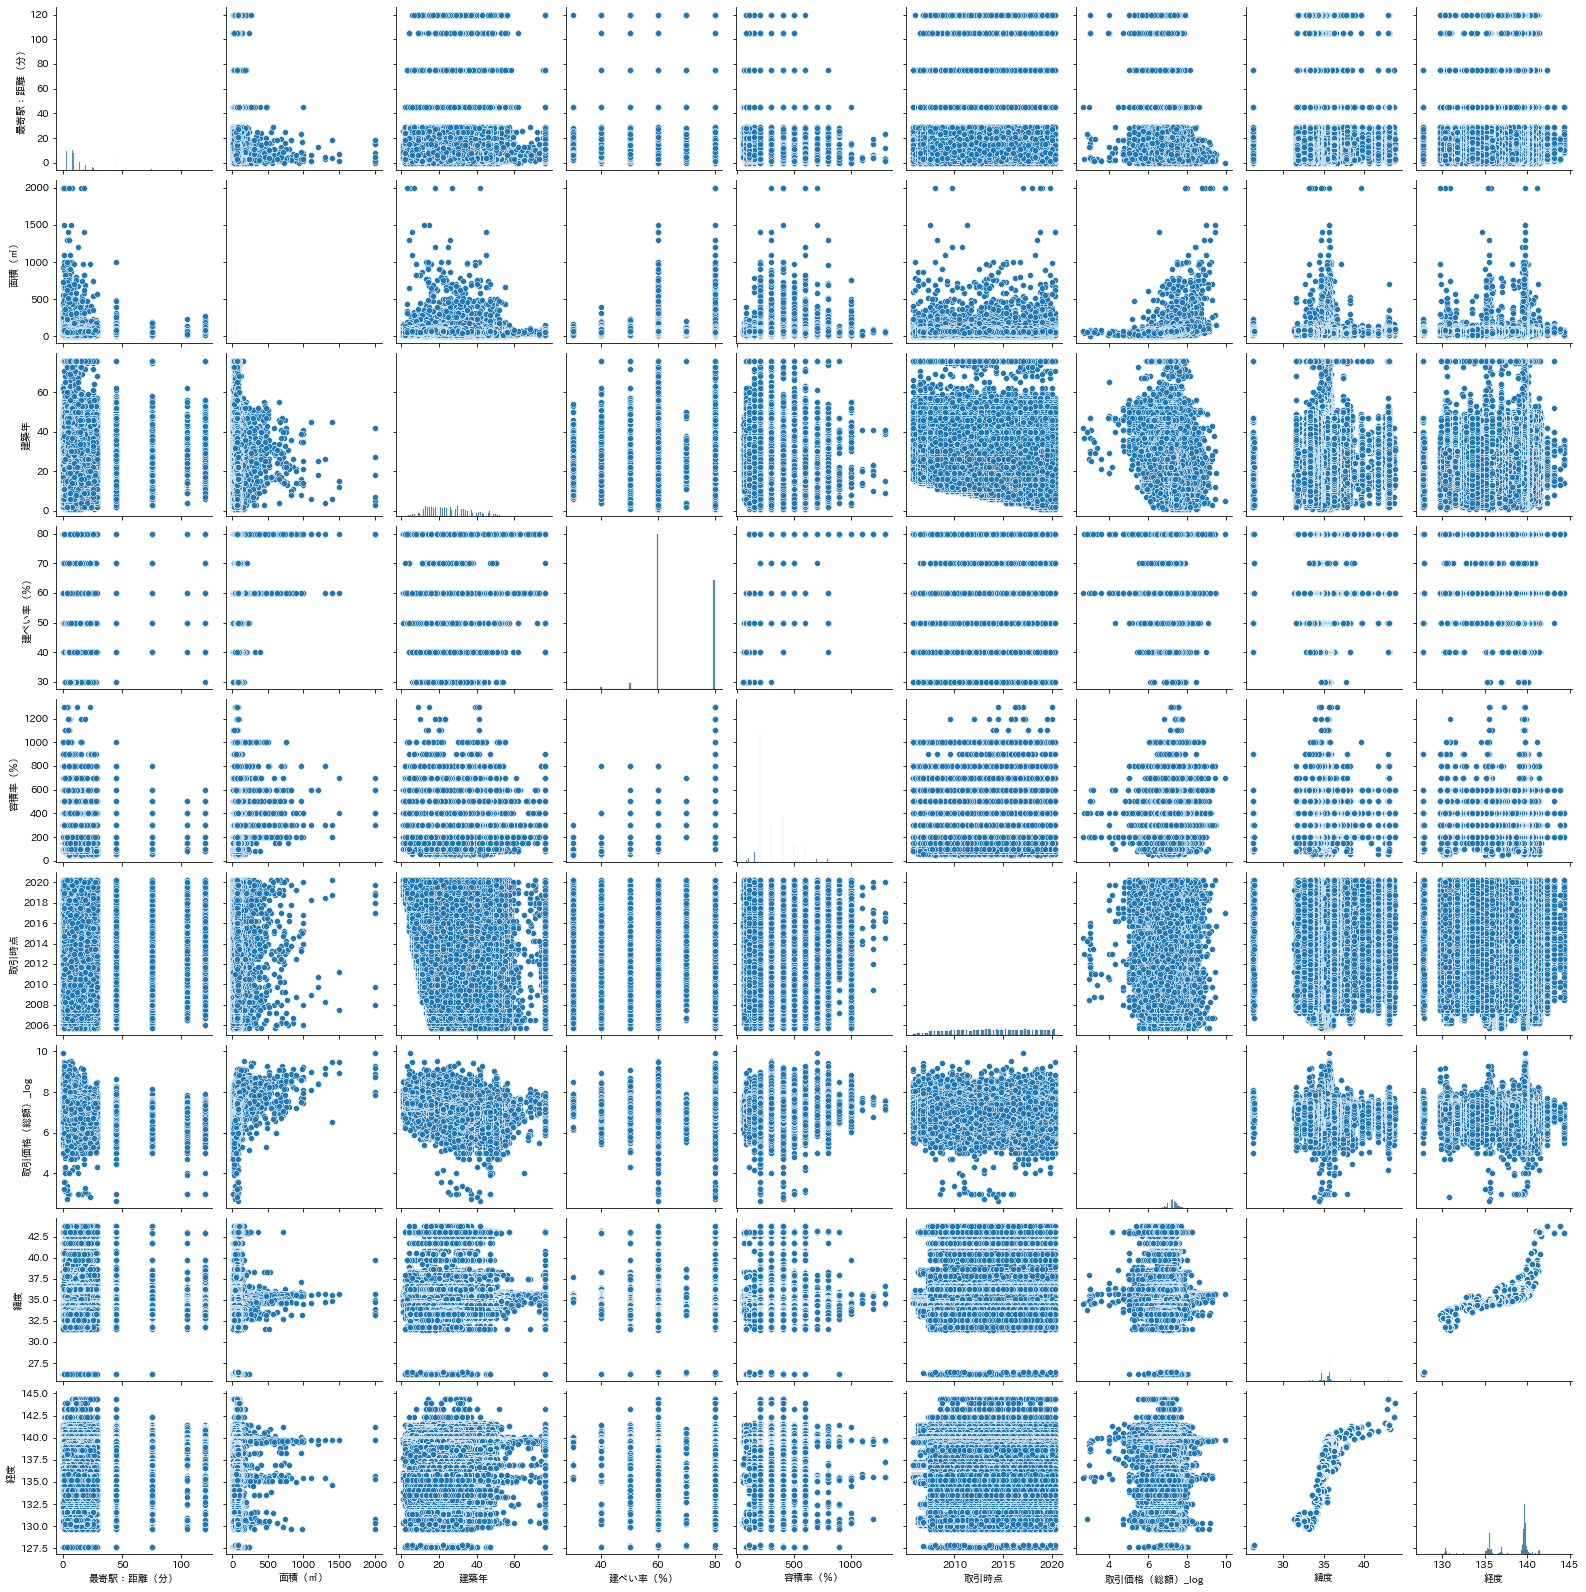

In [114]:
# 各カラムの関係
pg = sns.pairplot(df_t)
pg.savefig('seaborn_pairplot_default.png')

In [136]:
pref = df["都道府県名"].tolist()
pref = set(pref)

In [147]:
pref

{'三重県',
 '京都府',
 '佐賀県',
 '兵庫県',
 '北海道',
 '千葉県',
 '和歌山県',
 '埼玉県',
 '大分県',
 '大阪府',
 '奈良県',
 '宮城県',
 '宮崎県',
 '富山県',
 '山口県',
 '山形県',
 '山梨県',
 '岐阜県',
 '岡山県',
 '岩手県',
 '島根県',
 '広島県',
 '徳島県',
 '愛媛県',
 '愛知県',
 '新潟県',
 '東京都',
 '栃木県',
 '沖縄県',
 '滋賀県',
 '熊本県',
 '石川県',
 '神奈川県',
 '福井県',
 '福岡県',
 '福島県',
 '秋田県',
 '群馬県',
 '茨城県',
 '長崎県',
 '長野県',
 '青森県',
 '静岡県',
 '香川県',
 '高知県',
 '鳥取県',
 '鹿児島県'}

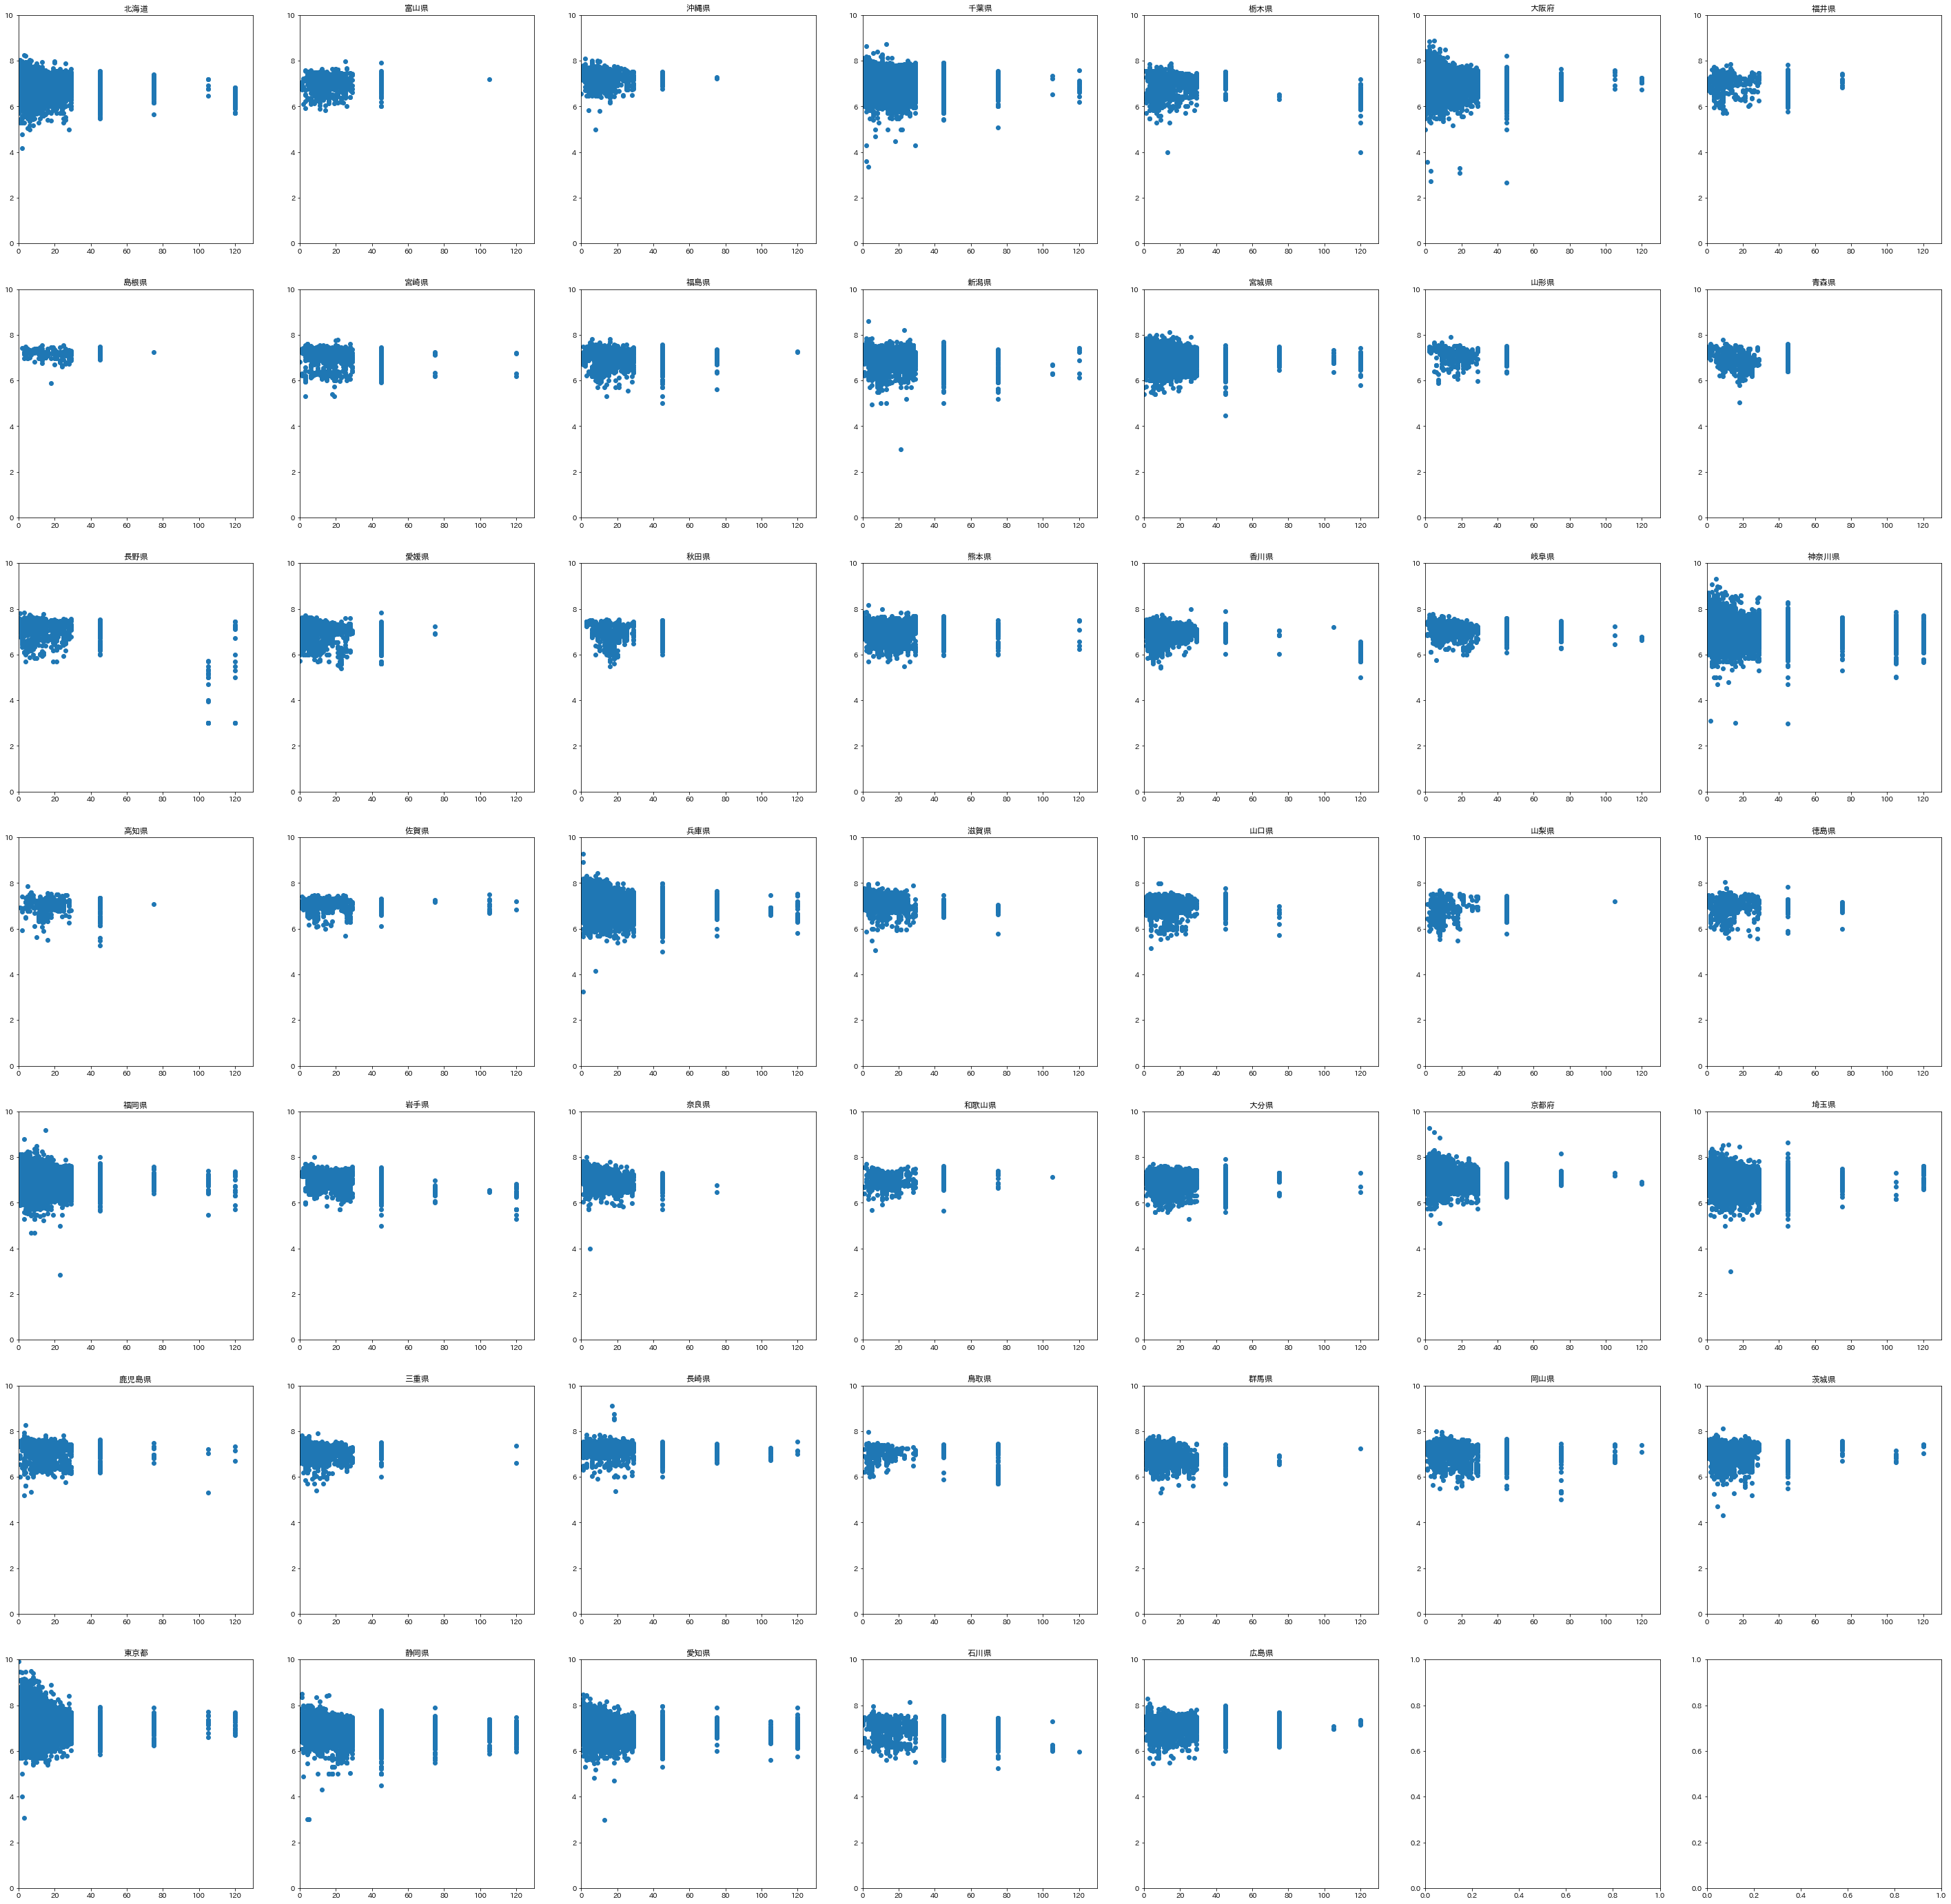

In [191]:
fig1, ax1 = plt.subplots(7, 7, figsize=(50, 50))
j = 0
for i, t in enumerate(pref):
    if j == 7:
        j = 0
    ax = i // 7
    ax1[ax][j].set_title(t)
#     ax1[ax][j].boxplot(df[df["都道府県名"]==t]["取引価格（総額）_log"])
    ax1[ax][j].scatter(df[df["都道府県名"]==t]["最寄駅：距離（分）"], df[df["都道府県名"]==t]["取引価格（総額）_log"])
    ax1[ax][j].set_xlim(0, 130)
    ax1[ax][j].set_ylim(0, 10)
    
    j = j + 1
plt.show()
fig1.savefig("pref_station_distance.png")